In [0]:
#Import some necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
!pwd

/content


In [0]:
#Read the csv formatted data as pandas dataframe 
train_data = pd.read_csv('/content/drive/My Drive/facial-keypoints-detection/training.csv')
test_data = pd.read_csv('/content/drive/My Drive/facial-keypoints-detection/test.csv')
lookup_id = pd.read_csv('/content/drive/My Drive/facial-keypoints-detection/IdLookupTable.csv')

**Some data exploration to figure out the size and content of the data as well as missing values**

In [14]:
train_data.shape

(7049, 31)

In [15]:
train_data.head().T #First five instances of our train data

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [16]:
train_data.isna().sum() #Number of missing values in each column

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [0]:
train_data.fillna(method='ffill', inplace=True) #Filling the missing values with forward fill method

In [0]:
train_data.isna().sum() #Check the missing values again to make sure we handled all the existing missing values

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

**Some preprocessing to prepare data for our CNN(Convolutional Neural Network) model**

Since the image files are given as a string in which each pixel is seperated by space, in order to be able to feed the images into our model, we will create a numpy array that each instance is shaped as (96, 96, 1) and each pixel is an integer. Since there are 7049 instances in total, our final array will have the shape of (7049, 96, 96, 1)

In [0]:
X = train_data.Image.values #Turn Image column of the data file into a numpy array

In [19]:
x = []
for img in tqdm(X):
    q = [int(pix) for pix in img.split()]
    x.append(q)
len(x)
    

100%|██████████| 7049/7049 [00:15<00:00, 469.57it/s]


7049

In [20]:
x = np.array(x)
x = x.reshape(7049, 96, 96, 1) #reshaping so we have (m, 96, 96, 1)
x = x / 255.0  # normalizing each feature(pixel) so it is faster for CNN to process
x.shape

(7049, 96, 96, 1)

In [21]:
del train_data['Image'] #Since we extracted the image files in the format we wanted, we can delete the Image column
y = train_data.values #Rest of the train data consists of keypoints which we will use as target vector
len(y)

7049

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.1) #We split the data as 90%train - 10%validation

In [24]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape #Shapes after train-validation split

((6344, 96, 96, 1), (705, 96, 96, 1), (6344, 30), (705, 30))

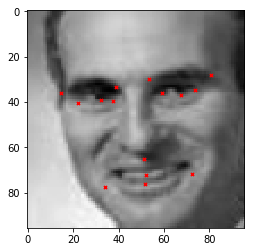

In [25]:
plt.imshow(X_train[2,:,:,0], cmap='gray') #A random image from the train data
plt.scatter(y_train[2][0::2] , y_train[2][1::2], c='red', marker='x', s=10) #Keypoints scattered on the image
plt.show()

In [0]:
#Import layers that we'll be using for the CNN architecture from tensorflow library
from tensorflow.keras.layers import LeakyReLU, Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

**Model Implementation**

We will build our model using tenserflow 2.0 which adopted keras syntax and has become a lot more intuitive compared to tensorflow 1.x

Our model will have 12 convolutional layers followed by 2 fully connected layers. There will be batch normalization after each convolutional layer and the activation functions for those layers will be leaky relu. Also there will be Max Pooling layer after every other convolutional layer

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Conv2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Conv2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Conv2D(256, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Conv2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))


In [29]:
model.summary() #Summary of our architecture

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0

In [0]:
early_stop_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True) #Define early stop

In [31]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'acc'])
model.fit(X_train, y_train, batch_size=256, epochs=50, validation_data=(X_val, y_val), 
          callbacks=[early_stop_cb],verbose=1)

Train on 6344 samples, validate on 705 samples
Epoch 1/50
6344/6344 [==============================] - 28s 4ms/sample - loss: 325.0414 - mae: 11.4838 - acc: 0.2554 - val_loss: 279.0484 - val_mae: 15.1554 - val_acc: 0.3617
Epoch 2/50
6344/6344 [==============================] - 13s 2ms/sample - loss: 30.7879 - mae: 4.3028 - acc: 0.3893 - val_loss: 241.8226 - val_mae: 14.3516 - val_acc: 0.6156
Epoch 3/50
6344/6344 [==============================] - 13s 2ms/sample - loss: 24.8580 - mae: 3.8408 - acc: 0.4070 - val_loss: 235.1019 - val_mae: 14.0720 - val_acc: 0.6156
Epoch 4/50
6344/6344 [==============================] - 13s 2ms/sample - loss: 22.8861 - mae: 3.6677 - acc: 0.4232 - val_loss: 225.8754 - val_mae: 13.7712 - val_acc: 0.6156
Epoch 5/50
6344/6344 [==============================] - 13s 2ms/sample - loss: 21.1637 - mae: 3.5170 - acc: 0.4327 - val_loss: 261.5464 - val_mae: 14.8791 - val_acc: 0.6156
Epoch 6/50
6344/6344 [==============================] - 13s 2ms/sample - loss: 19.8284

In [32]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.fit(x,y, batch_size=64, epochs=50) #Train the model on the entire data

Train on 7049 samples
Epoch 1/50
7049/7049 [==============================] - 20s 3ms/sample - loss: 28.1509 - mae: 3.0559
Epoch 2/50
7049/7049 [==============================] - 16s 2ms/sample - loss: 9.3409 - mae: 2.1716
Epoch 3/50
7049/7049 [==============================] - 16s 2ms/sample - loss: 8.1621 - mae: 2.0391
Epoch 4/50
7049/7049 [==============================] - 16s 2ms/sample - loss: 8.1616 - mae: 2.0594
Epoch 5/50
7049/7049 [==============================] - 16s 2ms/sample - loss: 6.7989 - mae: 1.8579
Epoch 6/50
7049/7049 [==============================] - 16s 2ms/sample - loss: 7.1594 - mae: 1.9371
Epoch 7/50
7049/7049 [==============================] - 16s 2ms/sample - loss: 7.1342 - mae: 1.9361
Epoch 8/50
7049/7049 [==============================] - 16s 2ms/sample - loss: 6.4085 - mae: 1.8347
Epoch 9/50
7049/7049 [==============================] - 16s 2ms/sample - loss: 6.2898 - mae: 1.8251
Epoch 10/50
7049/7049 [==============================] - 16s 2ms/sample - los

Preparing the test data in the same fashion we prepared the train data

In [33]:
test = test_data.Image.values
x_test = []
for img in tqdm(test):
    q = [int(j) for j in img.split()]
    x_test.append(q)
x_test = np.array(x_test)
x_test = x_test.reshape(-1, 96, 96, 1)
x_test = x_test / 255.0

100%|██████████| 1783/1783 [00:03<00:00, 484.01it/s]


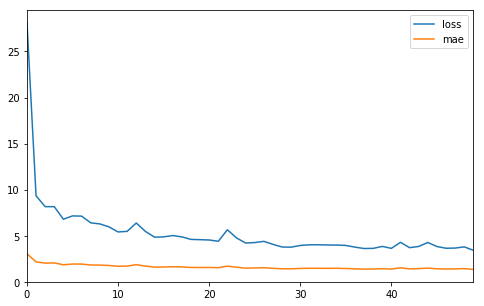

In [34]:
pd.DataFrame(model.history.history).plot(figsize=(8,5)) #Check mean squared error and mean absolute error

In [0]:
preds = model.predict(x_test)

In [36]:
preds.shape

(1783, 30)

**Visualisation of our results**

Let's visualise some of our results to get an idea how accurate our model is

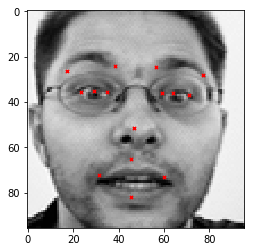

In [37]:
#Check the first image of test set to see how our model performed
plt.imshow(x_test[0,:,:,0], cmap='gray') #First image of the test data
plt.scatter(preds[0][0::2] , preds[0][1::2], c='red', marker='x', s=10) #Predicted keypoints on the image
plt.show()

Looks like our model did a good job, let's try it on the 10th image to see whether results are consistent

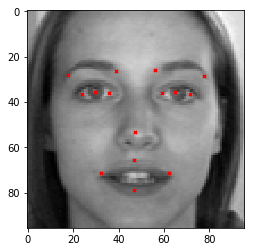

In [38]:
plt.imshow(x_test[9,:,:,0], cmap='gray') #10th image of the test data
plt.scatter(preds[9][0::2] , preds[9][1::2], c='red', marker='x', s=10) #Predicted keypoints on the image
plt.show()

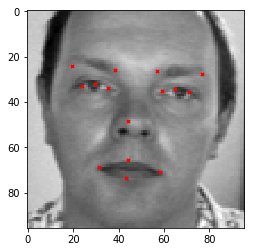

In [39]:
plt.imshow(x_test[15,:,:,0], cmap='gray') #16th image of the test data
plt.scatter(preds[15][0::2] , preds[15][1::2], c='red', marker='x', s=10) #Predicted keypoints on the image
plt.show()

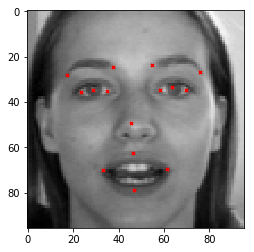

In [40]:
plt.imshow(x_test[19,:,:,0], cmap='gray') #20th image of the test data
plt.scatter(preds[19][0::2] , preds[19][1::2], c='red', marker='x', s=10) #Predicted keypoints on the image
plt.show()

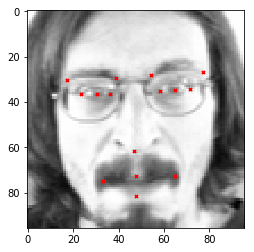

In [41]:
plt.imshow(x_test[29,:,:,0], cmap='gray') #30th image of the test data
plt.scatter(preds[29][0::2] , preds[29][1::2], c='red', marker='x', s=10) #Predicted keypoints on the image
plt.show()

Results are pretty good!
Now let's prepare the submission file for Kaggle

**Kaggle Submission**

NOTE: The rest of the notebook is preparation for Kaggle submission based on our predictions. Those of you who are not interested in Kaggle competition submission can skip this part

In [0]:
lookup_id.head()

In [0]:
lookid_list = list(lookup_id['FeatureName'])
imageID = list(lookup_id['ImageId']-1)
pre_list = list(preds)

In [0]:
rowid = lookup_id['RowId']
rowid = list(rowid)

In [0]:
feature = []
for feat in list(lookup_id['FeatureName']):
    feature.append(lookid_list.index(feat))

In [0]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

In [0]:
rowid = pd.Series(rowid, name='RowId')
loc = pd.Series(preded, name='Location')

In [0]:
submission = pd.concat([rowid, loc], axis=1)

In [0]:
submission.to_csv('face_keypoints_sub.csv', index=False)